<a href="https://colab.research.google.com/github/victorsant777/dioAn-lise-de-dados-com-Python-e-Pandas/blob/main/Trabalhando_com_Planilha_%26_Trabalhando_com_Data_%26_Visualizando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd

In [36]:
# Nesta linha iremos fazer a leitura das planilhas
df1 = pd.read_excel("/content/drive/MyDrive/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/datasets/Salvador.xlsx")

In [37]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [38]:
#efetuando a leitura das 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [39]:
#exibindo a ultima linha 
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [40]:
#verifica o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [41]:
#Alterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype("object")


In [42]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [43]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


**TRATANDO VALORES FALTANTES**

In [44]:
#consulta valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [45]:
#substituindo valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace= True)

In [46]:
#Substituir valores nulos por zero
df["Vendas"].fillna(0, inplace= True)

In [47]:
#Apagando as linhas com valores nulos 
df.dropna(inplace= True)

In [48]:
#Apagando as linhas com valores nulos com base com base em 1 linha
df.dropna(subset= ["Vendas"],inplace= True)

In [49]:
#Removendo linhas que esteja com valores faltantes
df.dropna(how="all",inplace= True)

**CRIANDO COLUNAS NOVAS**

In [50]:
#Criando coluna de Receitas
df["Receitas"] = df["Vendas"].mul(df["Qtde"])

In [51]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Retornar a maior receita
df["Receitas"].max()

In [ ]:
#Retornar a menor receita
df["Receitas"].min()

In [ ]:
df.nlargest(3, "Receitas")

In [ ]:
df.nsmallest(3, "Receitas")

In [54]:
#Agrupando por cidade
df.groupby("Cidade")["Receitas"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receitas, dtype: float64

In [56]:
#Ordenando conjunto de dados
df.sort_values("Receitas", ascending= False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


**TRABALHANDO COM DATAS**

In [58]:
df.dtypes

Cidade              object
Data        datetime64[ns]
Vendas             float64
LojaID              object
Qtde                 int64
Receitas           float64
dtype: object

In [59]:
#Verificando o tipo de dado de cada coluna
df['Data'] = pd.to_datetime(df["Data"])

In [60]:
df.dtypes

Cidade              object
Data        datetime64[ns]
Vendas             float64
LojaID              object
Qtde                 int64
Receitas           float64
dtype: object

In [61]:
#Agrupamento po ano
df.groupby(df['Data'].dt.year)["Receitas"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receitas, dtype: float64

In [66]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [72]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano)Venda,Ano_Venda,mes_venda,dia_venda
36,Natal,2019-02-09,328.00,853,2,656.00,2019,2019,2,9
73,Fortaleza,2019-01-01,3.10,1003,5,15.50,2019,2019,1,1
57,Recife,2019-01-01,201.41,980,3,604.23,2019,2019,1,1
234,Salvador,2019-01-03,48.39,1035,2,96.78,2019,2019,1,3
21,Recife,2019-01-01,164.74,983,1,164.74,2019,2019,1,1


In [68]:
#Extraindo o mês e o dia
df["mes_venda"],df["dia_venda"] = (df['Data'].dt.month, df["Data"].dt.day)

In [73]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano)Venda,Ano_Venda,mes_venda,dia_venda
51,Salvador,2019-01-01,13.37,1037,2,26.74,2019,2019,1,1
128,Recife,2019-03-02,38.70,982,4,154.80,2019,2019,3,2
6,Salvador,2019-01-01,36.30,1034,2,72.60,2019,2019,1,1
73,Recife,2019-01-01,39.71,981,5,198.55,2019,2019,1,1
132,Natal,2019-01-02,19.61,1036,2,39.22,2019,2019,1,2


In [76]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [77]:
#Calculando a diferença de datas
df["diferenca_dias"] = df["Data"] - df['Data'].min()

In [78]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano)Venda,Ano_Venda,mes_venda,dia_venda,diferenca_dias
133,Natal,2019-01-02,153.71,1035,1,153.71,2019,2019,1,2,366 days
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,2018,1,1,0 days
169,Natal,2019-01-02,166.73,1037,2,333.46,2019,2019,1,2,366 days
110,Natal,2019-01-02,185.93,1036,3,557.79,2019,2019,1,2,366 days
0,Natal,2018-08-27,606.00,853,2,1212.00,2018,2018,8,27,238 days


In [98]:
#Criando coluna de trimestre
df["trimestre_vendas"] = df['Data'].dt.quarter

In [99]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano)Venda,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_vendas,trimestre_vendas
180,Natal,2019-01-02,116.63,1035,2,233.26,2019,2019,1,2,366 days,1,1
73,Aracaju,2018-01-01,159.78,1521,3,479.34,2018,2018,1,1,0 days,1,1
89,Salvador,2019-01-01,17.46,1034,1,17.46,2019,2019,1,1,365 days,1,1
47,Natal,2018-03-13,521.00,854,3,1563.00,2018,2018,3,13,71 days,1,1
116,Natal,2019-01-02,41.78,1034,3,125.34,2019,2019,1,2,366 days,1,1


In [100]:
#Filtrando as vendas de 2019 do mês de marco
vendas_marco = df.loc[(df["Data"].dt.year==2019) & (df['Data'].dt.month == 3)]

In [101]:
vendas_marco

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano)Venda,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_vendas,trimestre_vendas
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,2019,3,2,425 days,1,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,2019,3,2,425 days,1,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,2019,3,2,425 days,1,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,2019,3,2,425 days,1,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,2019,3,2,425 days,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,2019,3,2,425 days,1,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,2019,3,2,425 days,1,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,2019,3,2,425 days,1,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,2019,3,2,425 days,1,1


In [102]:
df["LojaID"].value_counts(ascending= False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

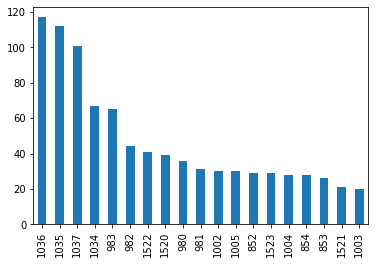

In [88]:
#Grafico de barras
df["LojaID"].value_counts(ascending= False).plot.bar()

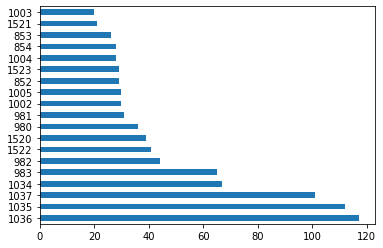

In [90]:
#Grafico de barras horizontal
df["LojaID"].value_counts().plot.barh()

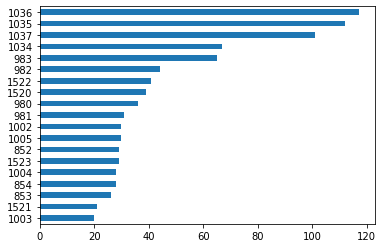

In [97]:
#Grafico de barras horizontal com exibição do maior para o menor
df["LojaID"].value_counts(ascending= True).plot.barh();

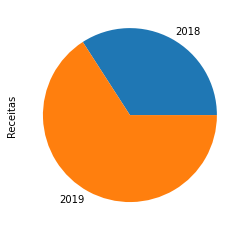

In [96]:
#Grafico de Pizza

df.groupby(df["Data"].dt.year)["Receitas"].sum().plot.pie()

In [94]:
# Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total_Vendas')

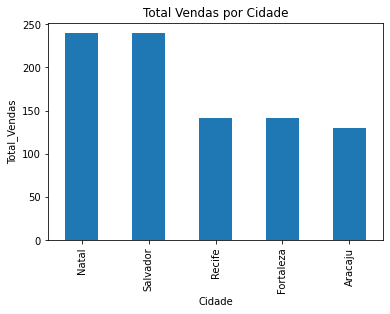

In [103]:
#Adicionando um titulo e alterando o nome do eixo
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total_Vendas")

Text(0, 0.5, 'Total_Vendas')

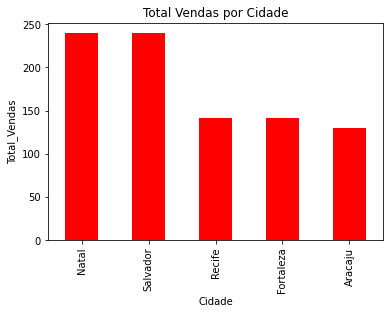

In [104]:
#Alterar a cor
df["Cidade"].value_counts().plot.bar(title="Total Vendas por Cidade", color = "red")
plt.xlabel("Cidade")
plt.ylabel("Total_Vendas")

In [105]:
#Alterarndo o stilo
plt.style.use("ggplot")

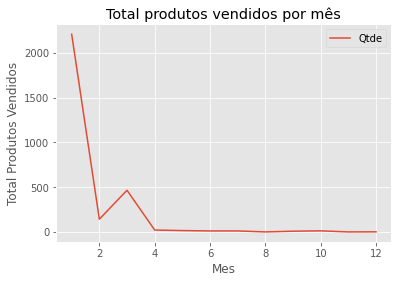

In [109]:
df.groupby(df['mes_venda'])["Qtde"].sum().plot(title="Total produtos vendidos por mês")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

In [110]:
df.groupby(df['mes_venda'])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [120]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

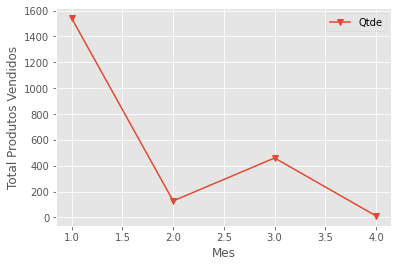

In [126]:
#"Total produtos vendidos por mês"
df_2019.groupby(df_2019['mes_venda'])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend()

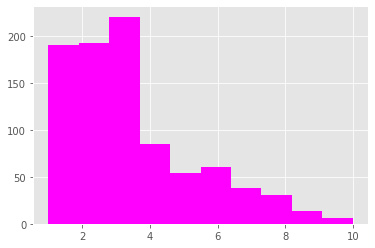

In [127]:
#Histograma
plt.hist(df["Qtde"], color = "magenta");

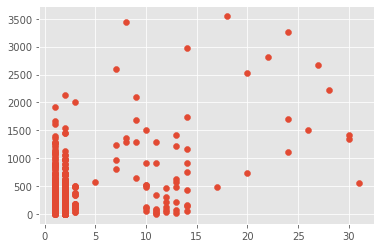

In [129]:
plt.scatter(x = df_2019["dia_venda"], y = df_2019["Receitas"]);

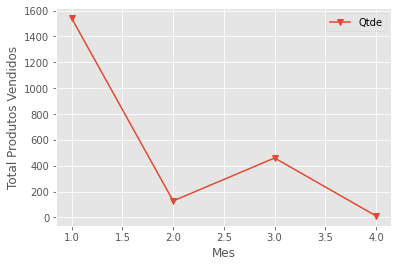

In [130]:
#Salvando em Png

df_2019.groupby(df_2019['mes_venda'])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt.savefig("grafico Qtde x Mes.png")